#### Data Preparation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# data from https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews
df = pd.read_csv(r"C:\Users\bharo\Downloads\tripadvisor_hotel_reviews.csv\tripadvisor_hotel_reviews.csv")
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


#### Encoding Sentiments 

In [4]:
df = df[df['Rating'] != 3]
df['Positively_Rated'] = np.where(df['Rating']>3,1,0) # select rating >3 as 1 and others as 0 removing neutral rating = 3
df.head()

,Review,Rating,Positively_Rated
0,nice hotel expensive parking got good deal sta...,4,1
1,ok nothing special charge diamond member hilto...,2,0
3,"unique, great stay, wonderful time hotel monac...",5,1
4,"great stay great stay, went seahawk game aweso...",5,1
5,love monaco staff husband stayed hotel crazy w...,5,1


In [5]:
# checking the proportion of positively and negatively rated observation
pd.crosstab(index = df['Positively_Rated'], columns ='Total count')

col_0,Total count
Positively_Rated,
0,3214
1,15093


### Splitting Data in Train and Test split

In [6]:
from sklearn.model_selection import train_test_split
# spliting data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(df['Review'], df['Positively_Rated'],random_state = 0)

### Tokenizing

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(X_train)

### Document Term Matrix

In [8]:
# transforming documents in a training data into a document _term matrix usinf vect.transform()
X_train_vectorized = vect.transform(X_train)

### Classification Model using logisticRegression

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=3000)

model.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=3000)

In [10]:
# Model scoring
from sklearn.metrics import  roc_auc_score
predictions = model.predict(vect.transform(X_test))
print('AUC', roc_auc_score(y_test, predictions))



AUC 0.9139635630794034


In [11]:
# testing the model
new_reviews = [ 'Very good effort, but not five stars', 'Clear and concise','there is issue','bad review']
X_new = vect.transform(new_reviews)
print (model.predict(X_new))

[1 1 1 1]


### Classifying model including n-grams

In [15]:
vect = CountVectorizer(min_df = 5, ngram_range=(1,2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
model = LogisticRegression(solver='lbfgs', max_iter=3000)
model.fit(X_train_vectorized, y_train)
y_pred = model.predict(vect.transform(X_test))


### Confusion Matrix 

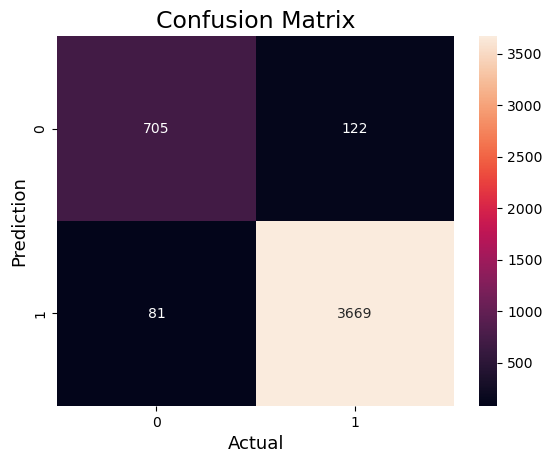

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

# plotting confusion matrix
sns.heatmap(cm, 
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [14]:
# finding precision and recall
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

Accuracy   : 0.9556478042385842
Precision : 0.9678185175415458
Recall    : 0.9784
F1-score  : 0.9730804933032755
